### Se importan librerias

In [1]:
# Librerias requeridas 

# ----------------------------
# 1. Análisis de Datos y Procesamiento
# ----------------------------
import pandas as pd  # Análisis y manipulación de datos
import numpy as np  # Cálculos numéricos y estadísticas

# ----------------------------
# 2. Tratamiento de fechas y tiempos
import datetime  # Tratamiento de fechas y tiempos
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8') # Configuración de la localización para fechas en español

# ----------------------------
# 3. Interaccion con el sistema operativo
# ----------------------------
import sys  # Interacción conda-forge
import os  # Interacción con el sistema operativo

# ----------------------------
# 4. Funciones genericas para la limpiez y trasformación de datos
# ----------------------------
import data_utils as du     # Funciones para la limpieza y transformación de datos 


### Carga de los datos

In [2]:
# Carga de datos bank-additional.csv
# ----------------------------------

# Cargar el archivo usando coma como delimitador y manejando las comas decimales
df_bank_additional = pd.read_csv('../Data/bank-additional.csv', sep=',', header=0, index_col=23, decimal=',', na_values='unknown')
# Visualización de las primeras filas del DataFrame
print("Dimensiones del DataFrame: ", df_bank_additional.shape)
print("Columnas del DataFrame: ", df_bank_additional.columns)
print("Tipos de datos del DataFrame: ", df_bank_additional.dtypes)
# Visualización de las primeras filas del DataFrame
print("Primeras filas del DataFrame:")      
df_bank_additional.head(3)

Dimensiones del DataFrame:  (43000, 23)
Columnas del DataFrame:  Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude'],
      dtype='object')
Tipos de datos del DataFrame:  Unnamed: 0          int64
age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate       object
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
date               object
latitude           object
longitu

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
id_,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233
e9d37224-cb6f-4942-98d7-46672963d097,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923
3f9f49b5-e410-4948-bf6e-f9244f04918b,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847


### Se eliminan columnas innecesarias

In [3]:
# Eliminar la columna innecesaria "Unnamed: 0"
if "Unnamed: 0" in df_bank_additional.columns:
    df_bank_additional = df_bank_additional.drop(columns=["Unnamed: 0"])
    
df_bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
id_,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,2-agosto-2019,41.495,-71.233
e9d37224-cb6f-4942-98d7-46672963d097,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923
3f9f49b5-e410-4948-bf6e-f9244f04918b,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,15-febrero-2019,34.939,-94.847
9991fafb-4447-451a-8be2-b0df6098d13e,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,29-noviembre-2015,49.041,-70.308
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,NONEXISTENT,1.1,93.994,-36.4,NaN,5191.0,no,29-enero-2017,38.033,-104.463


### Conversión de tipo a las columnas

In [4]:
# Convertir la columna de fecha a tipo datetime con la función de la librería data_utils

df_bank_additional = du.convertir_columnas_a_datetime(
    df_bank_additional,
    'date'
)

In [5]:
# Columnas categóricas
# ----------------------------
# | `default`        | Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No).                  |
# | `housing`        | Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).                                     |
# | `loan`           | Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No). 
# Estas tres columnas al convertirlas en numéricos con valores nulos genera outliers
# se decide convertirlas en columnas objects para ser tratadas como categoricas y los nulos se reemplazan por "Desconocido"

# Reemplazar los valores nulos por "Desconocido"
df_bank_additional['default'].fillna('Desconocido', inplace=True)
df_bank_additional['housing'].fillna('Desconocido', inplace=True)
df_bank_additional['loan'].fillna('Desconocido', inplace=True)
# Convertir las columnas categóricas a tipo 'category'
df_bank_additional['default'] = df_bank_additional['default'].astype('category')
df_bank_additional['housing'] = df_bank_additional['housing'].astype('category')
df_bank_additional['loan'] = df_bank_additional['loan'].astype('category')
# Verificar los tipos de datos después de la conversión
print("Tipos de datos después de la conversión:")
print(df_bank_additional.dtypes)
# Verificar los valores únicos de las columnas categóricas
print("Valores únicos en 'default':", df_bank_additional['default'].unique())
print("Valores únicos en 'housing':", df_bank_additional['housing'].unique())
print("Valores únicos en 'loan':", df_bank_additional['loan'].unique())

Tipos de datos después de la conversión:
age                       object
job                       object
marital                   object
education                 object
default                 category
housing                 category
loan                    category
contact                   object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
emp.var.rate              object
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed              float64
y                         object
date              datetime64[ns]
latitude                  object
longitude                 object
contact_year             float64
contact_month            float64
dtype: object
Valores únicos en 'default': ['0.0', 'Desconocido', '1.0']
Categories (3, object): ['0.0', '1.0', 'Desconocido']
Valores únicos en 'housing': ['0.0', '1.

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98366/821363358.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank_additional['default'].fillna('Desconocido', inplace=True)
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_98366/821363358.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [6]:
# convertir a números y manejar errores de conversión

# Convertir las columnas float que están en formato de texto
float_columns = ["latitude", "longitude", "emp.var.rate"]
for col in float_columns:
    df_bank_additional[col] = pd.to_numeric(df_bank_additional[col], errors='coerce')

# Convertir las columnas enteros que estan en formato float
enteros1_columns = ["pdays", "previous","campaign","previous","nr.employed","contact_year","contact_month"]
for col in enteros1_columns:
    df_bank_additional[col] = (
        # 1) Fuerza a numérico (coerciona strings no numéricos a NaN)
        pd.to_numeric(df_bank_additional[col], errors='coerce')
        # 2) Si tuvieses decimales .0, redondea al entero más cercano
        .round(0)
        # 3) Castea a entero nullable, preservando NaN como <NA>
        .astype("Int64")
    )

# Convertir las columnas numéricas de enteros que estan en texto
enteros_columns = ["age"]
for col in enteros_columns:
    # Convertir a números y luego a enteros, manejando errores
    df_bank_additional[col] = pd.to_numeric(df_bank_additional[col], errors='coerce').astype('Int64')

### Tratamiento de nulos

In [7]:
# Tratamiento de nulos en columnas object
object_column = df_bank_additional.select_dtypes(include=['object']).columns.tolist()
columna_con_NaN = du.verificar_columnas_con_nan(df_bank_additional, object_column)
for col in columna_con_NaN:
    # Reemplazar los valores NaN por "Indefinido"
    df_bank_additional[col] = df_bank_additional[col].fillna("Indefinido")

Columna 'job' SI tiene valores NaN.
Columna 'marital' SI tiene valores NaN.
Columna 'education' SI tiene valores NaN.
Columna 'contact' NO tiene valores NaN.
Columna 'poutcome' NO tiene valores NaN.
Columna 'y' NO tiene valores NaN.


In [8]:
# Tratamiento de nulos en columnas numéricas

# 1. crear una lista de columnas numéricas
columna_numericas = df_bank_additional.select_dtypes(include=['float64', 'Int64']).columns.tolist()
# 2. Verificar si hay columnas con NaN 
columna_con_NaN = du.verificar_columnas_con_nan(df_bank_additional, columna_numericas)
print("Columnas con NaN : ", columna_con_NaN)

# 3. Las Columnas con nulos se le imputan valores por estadísticas de distribución
columna_con_NaN = du.imputar_nulos_por_distribucion(df_bank_additional, columna_con_NaN)

Columna 'age' SI tiene valores NaN.
Columna 'duration' NO tiene valores NaN.
Columna 'campaign' NO tiene valores NaN.
Columna 'pdays' NO tiene valores NaN.
Columna 'previous' NO tiene valores NaN.
Columna 'emp.var.rate' NO tiene valores NaN.
Columna 'cons.price.idx' SI tiene valores NaN.
Columna 'cons.conf.idx' NO tiene valores NaN.
Columna 'euribor3m' SI tiene valores NaN.
Columna 'nr.employed' NO tiene valores NaN.
Columna 'latitude' NO tiene valores NaN.
Columna 'longitude' NO tiene valores NaN.
Columna 'contact_year' SI tiene valores NaN.
Columna 'contact_month' SI tiene valores NaN.
Columnas con NaN :  ['age', 'cons.price.idx', 'euribor3m', 'contact_year', 'contact_month']
Asimetría (skewness) de 'age': 0.797
Media    de 'age': 39.977
Mediana  de 'age': 38.000
Moda     de 'age': 31
Distribución asimétrica (|skew| ≥ 0.5), imputando con moda.
Asimetría (skewness) de 'cons.price.idx': -0.228
Media    de 'cons.price.idx': 93.574
Mediana  de 'cons.price.idx': 93.749
Moda     de 'cons.p

### Validar y corregir valores duplicados

In [9]:
# Verificar si hay valores duplicados en el DataFrame
if df_bank_additional.duplicated().any():
    print("El DataFrame contiene filas duplicadas.")
else:
    print("No se encontraron filas duplicadas en el DataFrame.")

No se encontraron filas duplicadas en el DataFrame.


In [10]:
df_bank_additional

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,contact_year,contact_month
id_,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,31,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,93.994,-36.4,4.857,5191,no,2019-08-02,41.495,-71.233,2019,8
e9d37224-cb6f-4942-98d7-46672963d097,57,services,MARRIED,high.school,Desconocido,0.0,0.0,telephone,149,1,...,93.994,-36.4,4.857,5191,no,2016-09-14,34.601,-83.923,2016,9
3f9f49b5-e410-4948-bf6e-f9244f04918b,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,93.994,-36.4,4.857,5191,no,2019-02-15,34.939,-94.847,2019,2
9991fafb-4447-451a-8be2-b0df6098d13e,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,93.994,-36.4,4.857,5191,no,2015-11-29,49.041,-70.308,2015,11
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,93.994,-36.4,4.857,5191,no,2017-01-29,38.033,-104.463,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4eed05de-2a98-4227-b488-32122009b638,31,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,618,2,...,93.444,-36.1,4.857,5228,yes,2015-10-13,38.147,-105.582,2015,10
0f0aca88-4088-4fe2-905f-44fb675d9493,34,technician,MARRIED,professional.course,0.0,1.0,1.0,cellular,42,7,...,93.200,-42.0,4.857,5196,no,2018-03-17,49.235,-112.201,2018,3
cadadd4b-7ee5-4019-b13a-ca01bb67ca5b,31,blue-collar,SINGLE,basic.6y,0.0,1.0,0.0,cellular,391,2,...,93.918,-42.7,4.857,5228,no,2016-09-15,40.679,-120.015,2016,9


In [11]:
df_bank_additional.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 089b39d8-e4d0-461b-87d4-814d71e0e079 to 993bbbd6-4dbc-4a40-a408-f91f8462bee6
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             43000 non-null  Int64         
 1   job             43000 non-null  object        
 2   marital         43000 non-null  object        
 3   education       43000 non-null  object        
 4   default         43000 non-null  category      
 5   housing         43000 non-null  category      
 6   loan            43000 non-null  category      
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  Int64         
 10  pdays           43000 non-null  Int64         
 11  previous        43000 non-null  Int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64      

### Tratamiento de outliers

In [12]:
# tratamiento de outliers en variables numéricas
# Para las columnas duration, campaign, plays y previous, en lugar de eliminar registros 
# con valores extremos, se aplica un escalado robusto 
du.robust_scale_duration(df_bank_additional, 'age')
du.robust_scale_duration(df_bank_additional, 'duration')
du.robust_scale_duration(df_bank_additional, 'campaign')
du.robust_scale_duration(df_bank_additional, 'previous')

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,contact_year,contact_month
id_,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,31,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,93.994,-36.4,4.857,5191,no,2019-08-02,41.495,-71.233,2019,8
e9d37224-cb6f-4942-98d7-46672963d097,57,services,MARRIED,high.school,Desconocido,0.0,0.0,telephone,149,1,...,93.994,-36.4,4.857,5191,no,2016-09-14,34.601,-83.923,2016,9
3f9f49b5-e410-4948-bf6e-f9244f04918b,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,93.994,-36.4,4.857,5191,no,2019-02-15,34.939,-94.847,2019,2
9991fafb-4447-451a-8be2-b0df6098d13e,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,93.994,-36.4,4.857,5191,no,2015-11-29,49.041,-70.308,2015,11
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,93.994,-36.4,4.857,5191,no,2017-01-29,38.033,-104.463,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4eed05de-2a98-4227-b488-32122009b638,31,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,618,2,...,93.444,-36.1,4.857,5228,yes,2015-10-13,38.147,-105.582,2015,10
0f0aca88-4088-4fe2-905f-44fb675d9493,34,technician,MARRIED,professional.course,0.0,1.0,1.0,cellular,42,2,...,93.200,-42.0,4.857,5196,no,2018-03-17,49.235,-112.201,2018,3
cadadd4b-7ee5-4019-b13a-ca01bb67ca5b,31,blue-collar,SINGLE,basic.6y,0.0,1.0,0.0,cellular,391,2,...,93.918,-42.7,4.857,5228,no,2016-09-15,40.679,-120.015,2016,9


({'age': id_
  29107b18-a5a3-4a15-9b12-f2f88667037f    67
  82d88f4f-27e5-4923-a6d0-990e08662255    68
  2d6f36f1-9738-4b2b-af22-e54fc11e243c    68
  9a0272c4-de92-419b-9cd4-38a9881c3022    67
  33d86cd4-b338-4026-8986-4818d2e0c2ce    67
  3e433126-1854-4f07-ba3b-97569316470a    67
  3da935c4-d24b-48cb-942d-501ab920d2be    68
  cef672b5-6643-4a3b-a7cb-442768e30a2c    68
  45644caf-eb72-4e3c-a245-6cb37e70c4b0    67
  9dd895cb-0a53-4f60-95c5-5d28c86d3dec    67
  aa780219-d3ea-43e0-b070-6cd0b1692dee    68
  54e4025e-7be3-4ca3-97c6-73a249f9327a    67
  26adf0ff-da40-4956-aafb-39e825bf6b43    67
  cb8fc04f-3eaf-454a-910d-1bad175e75aa    68
  c12905b4-032c-4a28-bf73-535133559459    67
  a1eefed5-8714-4376-b731-9ae958bd8d0c    67
  ceddd4e9-0386-4ac2-b745-fe2beb19ef31    68
  91b19a29-ad4d-4c08-ad9f-fbf89693ee50    68
  e9f868fe-2dc0-4003-aecb-514f104c57a7    68
  0e159252-72af-4d3c-8d0b-7aa612ca844e    68
  f7a1d42d-9776-4704-a42a-697447f65bef    68
  d1b9289a-79ed-41d7-8651-c46902d1f299    

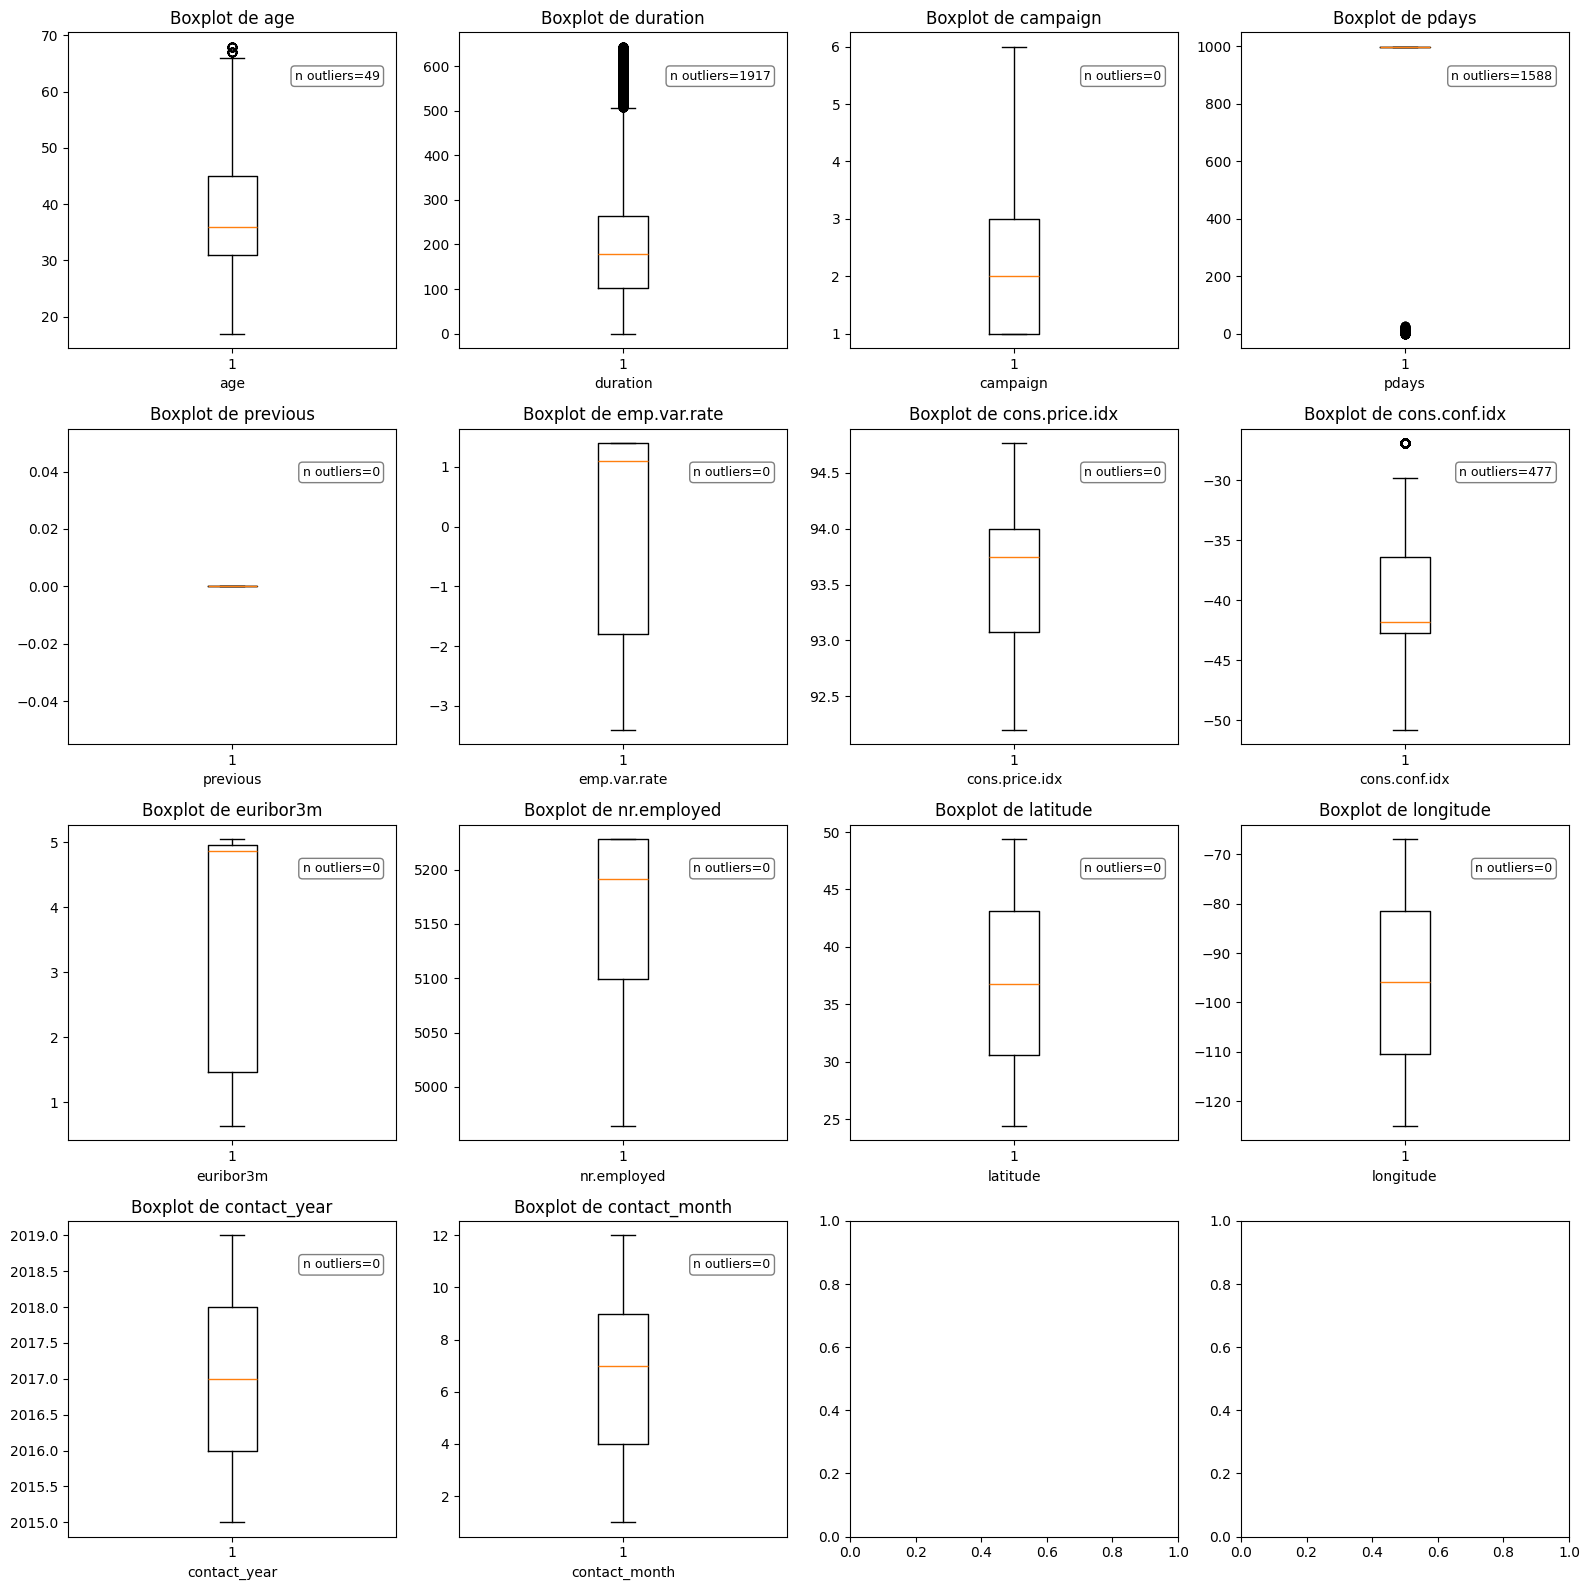

In [13]:
du.listar_outliers_y_boxplot(df_bank_additional,columna_numericas,)

### Almacenamiento del dataframe limpio

In [14]:
# Grabamos el resultado en un archivo .PLK con los datos limpios

# Definimos la ruta y nombre del archivo de salida
current_dir = os.getcwd()
parent_dir = os.path.join(current_dir, '../Data')
output_path = os.path.join(parent_dir, 'bank_additional_limpio.plk') 
os.makedirs(os.path.dirname(output_path), exist_ok=True)


# Guardar el archivo limpio en pickle para mantener los typos de datos
df_bank_additional.to_pickle(output_path)